# Homework 3

## Pair Programming Group Number: 18
## Members of Team: 
### Fayed Nassor
### Mohamad Minoneshan


## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/')

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna(axis=0,how='any').reset_index(drop=True)

## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    
    pt1 = np.radians(pt1)
    pt2 = np.radians(pt2)
    d = pt2- pt1
    a = np.sin(d[0] / 2)**2 + np.cos(pt1[0]) * np.cos(pt2[0]) * np.sin(d[1]/ 2)**2
 
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of earth in kilometers. 
    r = 6371.0088
      
    # calculate the result
    return(c * r)
  
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244772513569124

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df1['distance_to_toorak'] = df1.apply(lambda row: haversine_distance(toorak_pt, [row['Lattitude'], row['Longtitude']]), axis=1)

# Save the new DataFrame as df2
df2 = df1.copy()
df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
df3 = pd.get_dummies(df2, columns=['Type'])
df3

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612,1,0,0
1,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843,1,0,0
2,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206,1,0,0
3,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655,1,0,0
4,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846,1,0,0
3906,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623,1,0,0
3907,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784,0,1,0
3908,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684,0,1,0


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method='pearson')

/var/folders/sp/_yfy8qp56nx2sqc_p0txp39m0000gn/T/ipykernel_54361/304739039.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr(method='pearson')


,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,Type_h,Type_t,Type_u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
df_numeric = df3.select_dtypes(np.number)
X = df_numeric.drop(columns='Price')
X['intercept'] = np.ones(3910)*10
X

,Rooms,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,Type_h,Type_t,Type_u,intercept
0,2,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4.261612,1,0,0,10.0
1,3,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4.621843,1,0,0,10.0
2,2,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4.374206,1,0,0,10.0
3,2,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4.780655,1,0,0,10.0
4,2,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,-37.80780,144.99650,4.152012,0,0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,-37.70425,144.93164,16.998846,1,0,0,10.0
3906,4,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,-37.70077,145.12743,18.491623,1,0,0,10.0
3907,3,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,-37.94775,145.02379,11.798784,0,1,0,10.0
3908,4,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,-37.94633,145.04947,11.986684,0,1,0,10.0


In [9]:
# Step two, build the column vector y
y = df_numeric['Price']

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)

beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond=None)
beta_hat

array([ 1.37519623e+05,  6.35591132e+02,  2.57774471e+04,  2.03540724e+05,
        5.44025948e+04,  1.94402030e+01,  1.22151756e+03, -3.11155825e+03,
       -6.16718945e+05, -2.09209148e+05, -4.35776171e+04,  2.12620460e+05,
        2.27040977e+04, -1.19872917e+05,  1.15451640e+06])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

668241.4294307758

In [12]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [49]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
df_test = pd.read_csv('https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv')
impute = df_test.fillna(method = 'ffill')
impute = impute.fillna(method = 'backfill')
#front and backfill to get imputed values

In [46]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
impute['distance_to_toorak'] = impute.apply(lambda row: haversine_distance(toorak_pt, [row['Lattitude'], row['Longtitude']]), axis=1)
impute2 = impute.copy()
impute3 = pd.get_dummies(impute2, columns=['Type'])

In [51]:
# Step two, build the attribute matrix Xdot 
impute_numeric = impute3.select_dtypes(np.number)
y2 = impute_numeric['Price']
X2 = impute_numeric.drop(columns='Price')
X2['intercept'] = np.ones(1021)*10
beta_hat2, residuals2, rank2, s2 = np.linalg.lstsq(X2,y2,rcond=None)
beta_hat2

array([-9.74201833e+04,  8.12362511e+02,  2.46199725e+05,  1.69930853e+05,
        3.89971726e+03,  4.12504276e+01, -6.56155287e+00, -1.83953505e+03,
       -9.02626601e+05, -4.10427696e+05, -4.57497209e+04,  3.57590444e+05,
       -2.04036521e+04, -6.49843711e+04,  2.72202421e+06])

In [54]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.matmul(X2,beta_hat) 

In [88]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
error_vec = abs(y2 - y_hat)
error_vec

0       2.003355e+05
1       1.912065e+05
2       1.558868e+04
3       6.299388e+04
4       1.099795e+06
            ...     
1016    1.363864e+05
1017    9.675236e+04
1018    1.815409e+05
1019    9.226410e+04
1020    1.619156e+05
Length: 1021, dtype: float64

(0.0, 10000000.0)

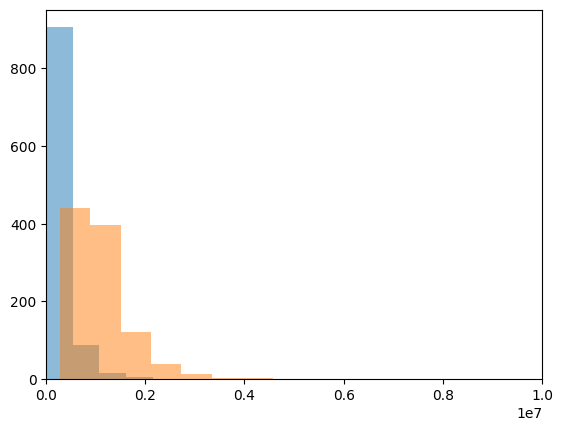

In [90]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent
plt.hist(error_vec,bins=100, alpha = .5,align='mid')
plt.hist(y2, alpha = .5,align='mid')
plt.xlim(xmin = 0, xmax = 1e7)